### Number of features

In [1]:
from pathlib import Path
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize
from scipy.ndimage import gaussian_filter
from palettable.matplotlib import Inferno_20 as ColMap
from src.config import SUBJECTS, SESSION, N_LAYER
from src.stats import Bootstrap
plt.style.use(os.path.join(module_path, "src", "default.mplstyle"))

DIR_DATA = "/data/pt_01880/Experiment1_ODC/paper/n_features"
FILTER_SIZE = "none"
GAUSSIAN = 7.0  # size of gaussian filter

# set
SESS = "VASO"
PART = 2  # 0, 1, or 2

In [2]:
def get_profile(sess, day):
    data = []
    for subj in SUBJECTS:
        path = Path(DIR_DATA) / subj / f"{sess}{SESSION[subj][sess][day]}"
        file = path / "accuracy.csv"
        data.append(np.genfromtxt(file, delimiter=','))
    return data

In [3]:
z1 = get_profile(SESS, 0)
z2 = get_profile(SESS, 1)
z3 = np.vstack((z1, z2))
if PART == 0:
    data = np.mean(z1, axis=0)
elif PART == 1:
    data = np.mean(z2, axis=0)
elif PART == 2:
    data = np.mean(z3, axis=0)
else:
    raise ValueError("Unknown part!")

nx, ny = 500, 250
x, y = np.meshgrid(np.arange(ny), np.arange(nx))
data_resized = resize(data, (nx,ny))
data_filtered = gaussian_filter(data_resized, GAUSSIAN)
data_filtered *= 100

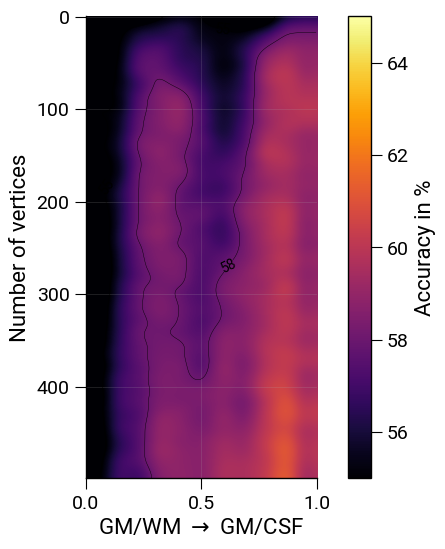

In [4]:
fig, ax = plt.subplots()
im = ax.imshow(data_filtered, cmap=ColMap.mpl_colormap)
if SESS == "VASO":
    cs = ax.contour(x, y, data_filtered, [55.0, 58.0], colors="black", linewidths=0.3)  # vaso
    im.set_clim([55, 65])
elif SESS == "GE_EPI":
    cs = ax.contour(x, y, data_filtered, [88.0, 91.0], colors="black", linewidths=0.3)  # ge_epi
    im.set_clim([85, 95])
elif SESS == "SE_EPI":
    cs = ax.contour(x, y, data_filtered, [70.0, 75.0], colors="black", linewidths=0.3)  # se_epi
    im.set_clim([65, 75])
ax.clabel(cs, inline=True, fontsize=10)
ax.set_xticks([0, 125, 250], [0.0, 0.5, 1.0])
ax.set_xlabel(r"GM/WM $\rightarrow$ GM/CSF")
ax.set_ylabel("Number of vertices")
cbar = plt.colorbar(im)
cbar.set_label("Accuracy in %")
file_out = f"/data/pt_01880/n_features_{SESS}_{PART}.svg"
#fig.savefig(file_out, dpi=300, bbox_inches="tight", transparent=True, format="svg")